In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import corner 

In [176]:
#Loading our data
mcmcChain = np.loadtxt('planck_chain_tauprior.txt')
mcmcChain = mcmcChain[:]
partition =  7500


#ranking

In [177]:
lenChain = len(mcmcChain[:])

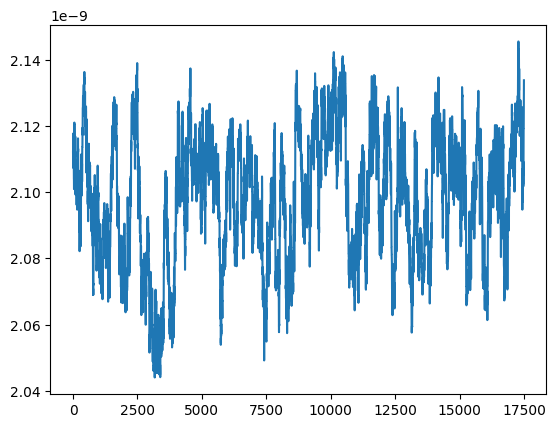

In [178]:
plt.plot(mcmcChain[partition:,5])
subchain = mcmcChain[:partition,:]


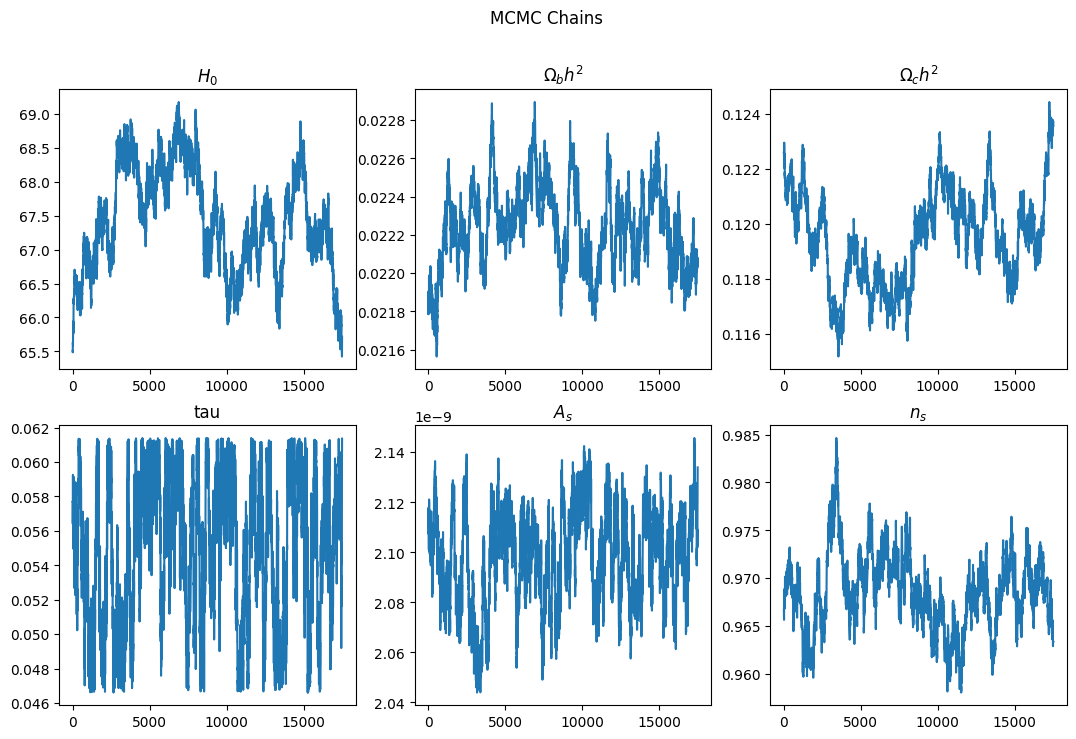

In [179]:
labels = ['$H_0$','$\Omega_b h^2$','$\Omega_c h^2$','tau','$A_s$', '$n_s$']
steps = np.arange(lenChain-partition)+1

fig,axs = plt.subplots(2,3, figsize = (13,8),sharey= False)
pltCounter = 1
for i in range (2):
    for j in range(3):
       
        axs[i,j].plot(mcmcChain[partition:,pltCounter])
        axs[i,j].set_title(labels[pltCounter-1])
        pltCounter += 1
plt.suptitle('MCMC Chains')
plt.savefig('chainPlot.png')

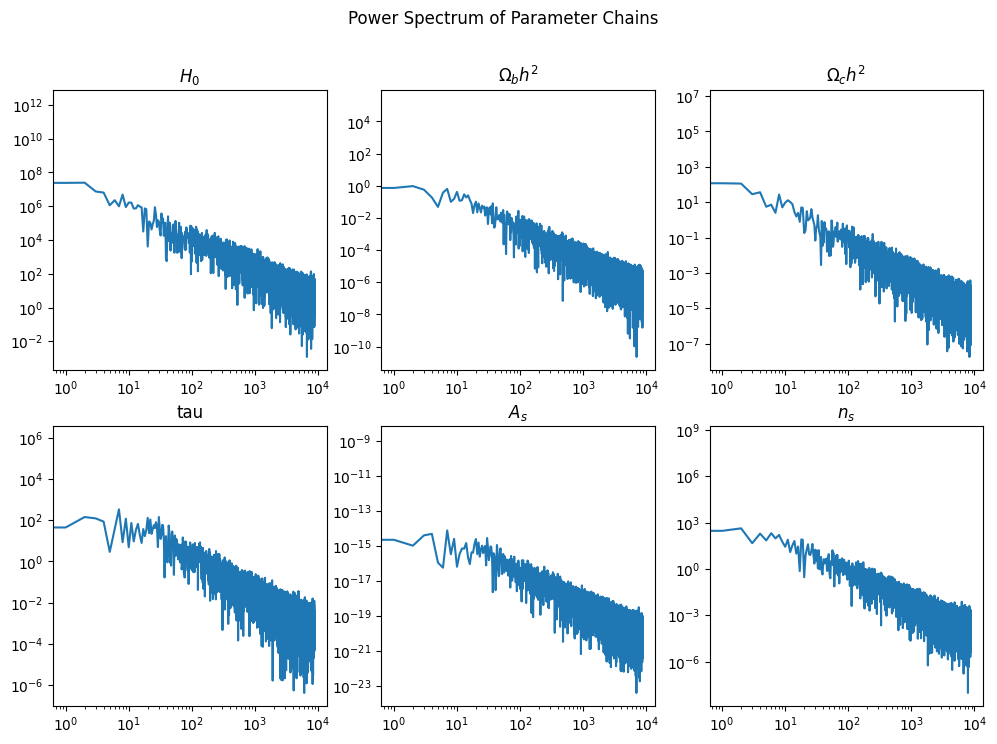

In [180]:
fig,axs = plt.subplots(2,3, figsize = (12,8),sharey= False)
pltCounter = 1
for i in range (2):
    for j in range(3):
        axs[i,j].loglog(abs(np.fft.rfft(mcmcChain[partition:,pltCounter])**2))
        axs[i,j].set_title(labels[pltCounter-1])
        pltCounter += 1
plt.suptitle('Power Spectrum of Parameter Chains')
plt.savefig('fft.png')

2576.860284293969


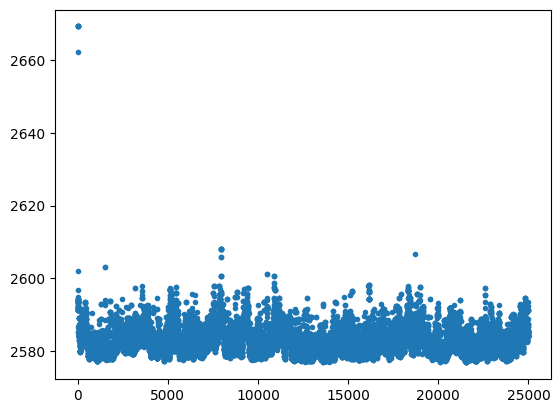

In [181]:
plt.plot(mcmcChain[:,0],'.')
print(min(mcmcChain[:,0]))

(array([ 189., 1539., 2714., 3411., 4121., 5093., 4207., 2350., 1153.,
         223.]),
 array([0.11517964, 0.11610478, 0.11702991, 0.11795505, 0.11888019,
        0.11980533, 0.12073046, 0.1216556 , 0.12258074, 0.12350588,
        0.12443101]),
 <BarContainer object of 10 artists>)

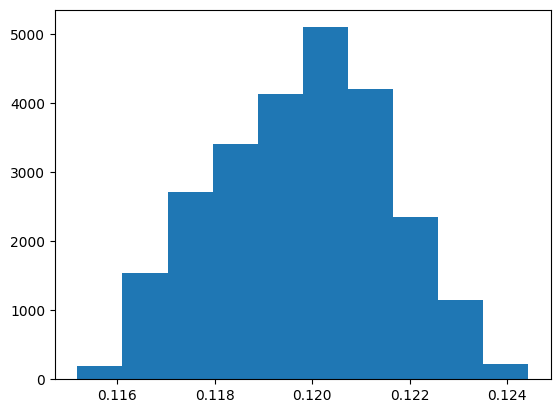

In [182]:
plt.hist(mcmcChain[:,3])

In [183]:
p = []
pstd = []
for i in range(6):
    p.append(np.mean(mcmcChain[partition:,(i+1)]))
    pstd.append(np.std(mcmcChain[partition:,(i+1)]))

In [184]:
print(p)
print(pstd)

[67.43800823817627, 0.02224228403528233, 0.11944880559419128, 0.054989130374383154, 2.098264716563942e-09, 0.9685243138678106]
[0.7631337021619218, 0.00021583305705961958, 0.001697363049718099, 0.004316141670335764, 1.947916864083556e-11, 0.0040400358934983074]


In [47]:
print(5<7<9)

True


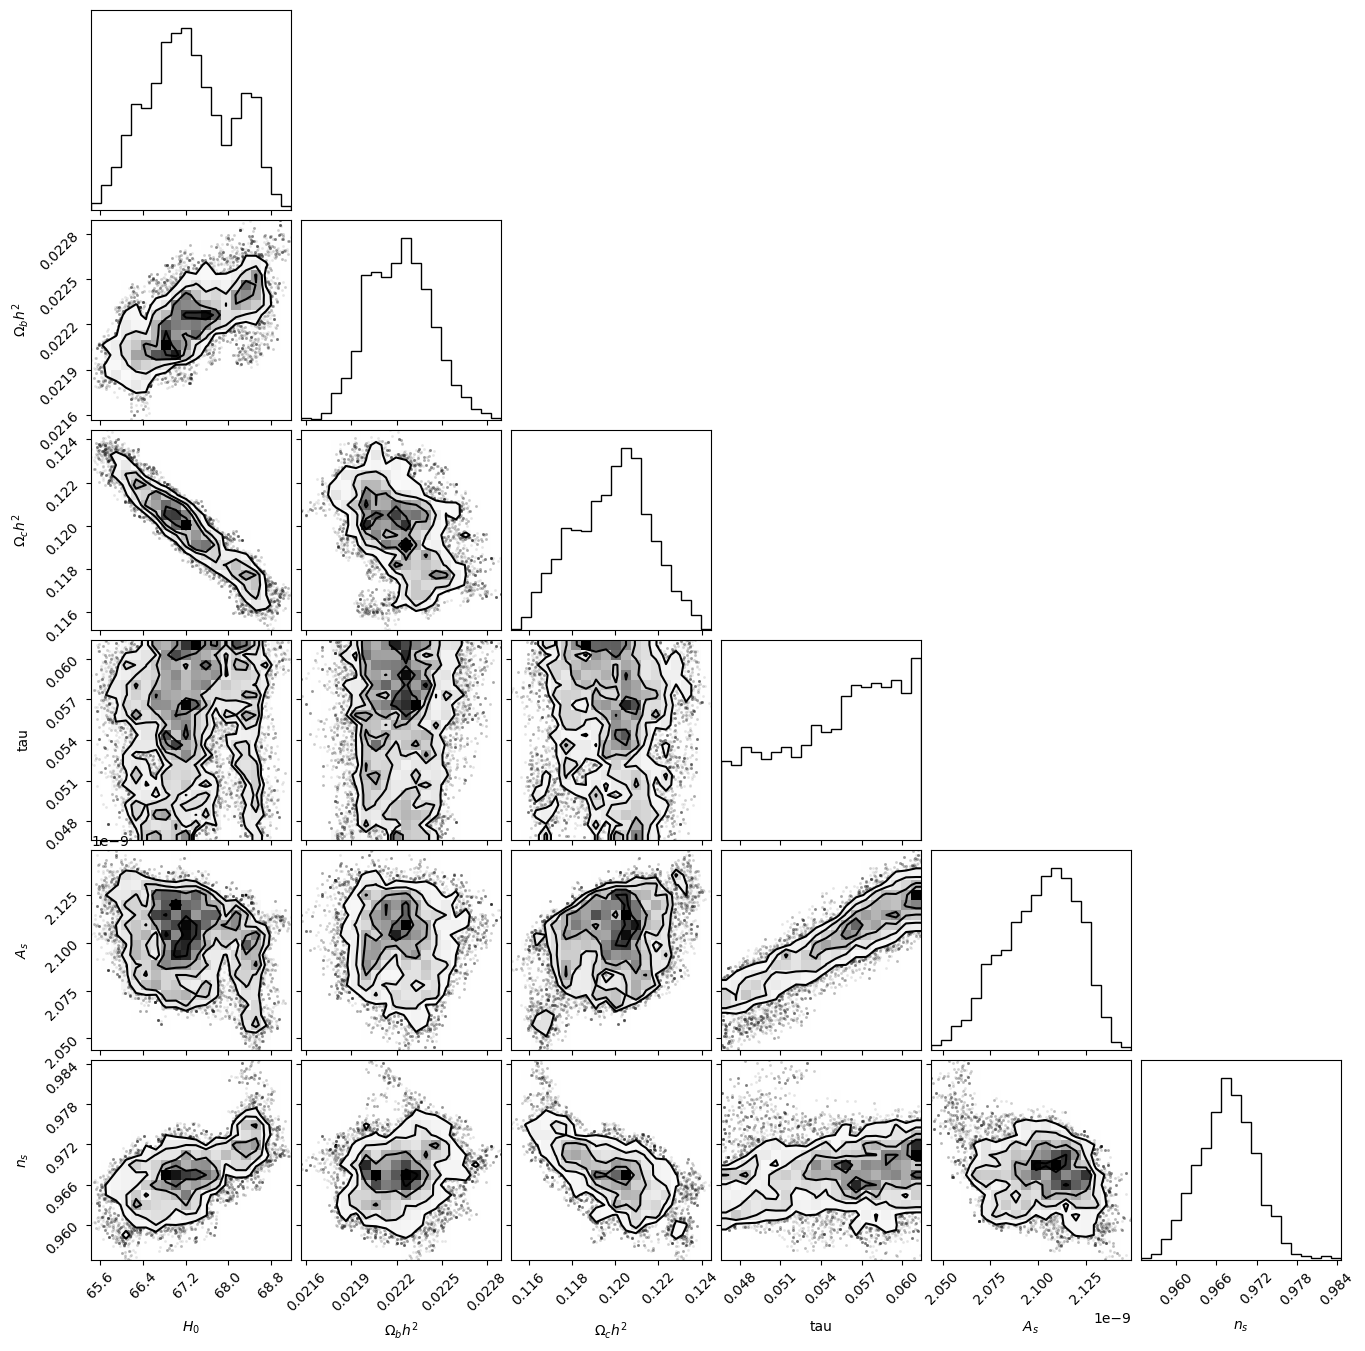

In [38]:
myplot = corner.corner(mcmcChain[partition:,1:],labels= labels,size = (2,2))

plt.savefig('CornerPlt.png')